<a href="https://colab.research.google.com/github/melvin-gif/NetflixTitles-DataCleaning/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving diamonds.csv to diamonds.csv


**Q2-Clean data and carry out Exploratory Data Analysis**

Data Understanding

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
#Retrieve descriptive statistics about the data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Check all column names
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
# Examine unique values in categorical features

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['table'].unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
# Check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
# Count missing values per column
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
# Count unique values in each column
df.nunique()

,0
carat,273
cut,5
color,7
clarity,8
depth,184
table,127
price,11602
x,554
y,552
z,375


Data Cleaning

In [ ]:
# Remove unnecessary column
#df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Check for any duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [ ]:
# Confirm that duplicate values have been dropped
df.duplicated().sum()

np.int64(0)

In [ ]:
# Re-check for missing values after cleaning
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
# Verify data types are correct
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
# Investigate the x, y, z dimensions
print(df[['x', 'y', 'z']].describe())

                  x             y             z
count  53775.000000  53775.000000  53775.000000
mean       5.731579      5.734909      3.539964
std        1.118611      1.139451      0.702017
min        3.730000      3.680000      1.070000
25%        4.710000      4.720000      2.910000
50%        5.700000      5.710000      3.530000
75%        6.540000      6.540000      4.030000
max       10.740000     58.900000     31.800000


In [ ]:
#Remove Outliers given that from the above we have seen the minimum value is 1.070 and the maximum is 6.540

In [ ]:
# Remove diamonds with zero dimensions (impossible)
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

In [ ]:
# Remove diamonds with unrealistic dimensions (> 10mm)
df = df[(df['x'] < 10) & (df['y'] < 10) & (df['z'] < 10)]

Exploratory Data Analysis

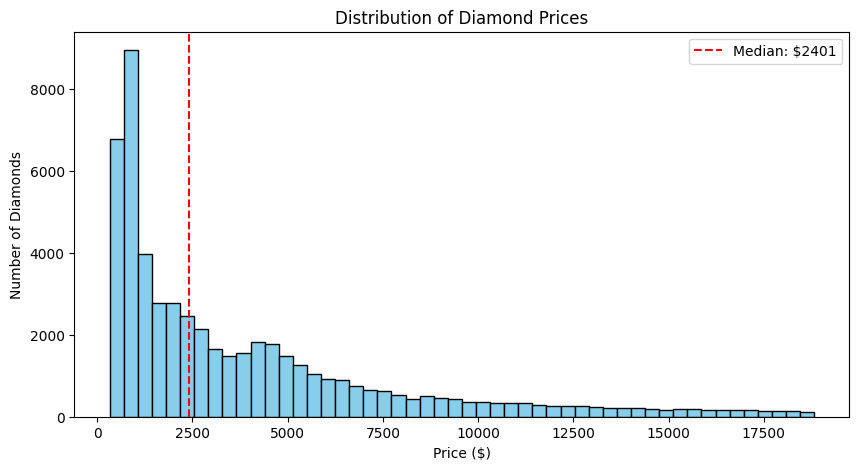

Most diamonds in this dataset are actually pretty affordable - about 75% of them cost less than $5322.
The median price is $2401, but the average is higher at $3930.
This tells us there are some really expensive diamonds that pull the average up.


In [ ]:
# INSIGHT 1: Price Distribution

plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Number of Diamonds')
plt.title('Distribution of Diamond Prices')
plt.axvline(df['price'].median(), color='red', linestyle='--', label=f'Median: ${df["price"].median():.0f}')
plt.legend()
plt.show()

print(f"Most diamonds in this dataset are actually pretty affordable - about 75% of them cost less than ${df['price'].quantile(0.75):.0f}.")
print(f"The median price is ${df['price'].median():.0f}, but the average is higher at ${df['price'].mean():.0f}.")
print(f"This tells us there are some really expensive diamonds that pull the average up.")


INSIGHT 2: Which Features Correlate with Price?
price    1.000000
carat    0.922239
y        0.888591
x        0.886999
z        0.881860
table    0.126381
depth   -0.011636
Name: price, dtype: float64


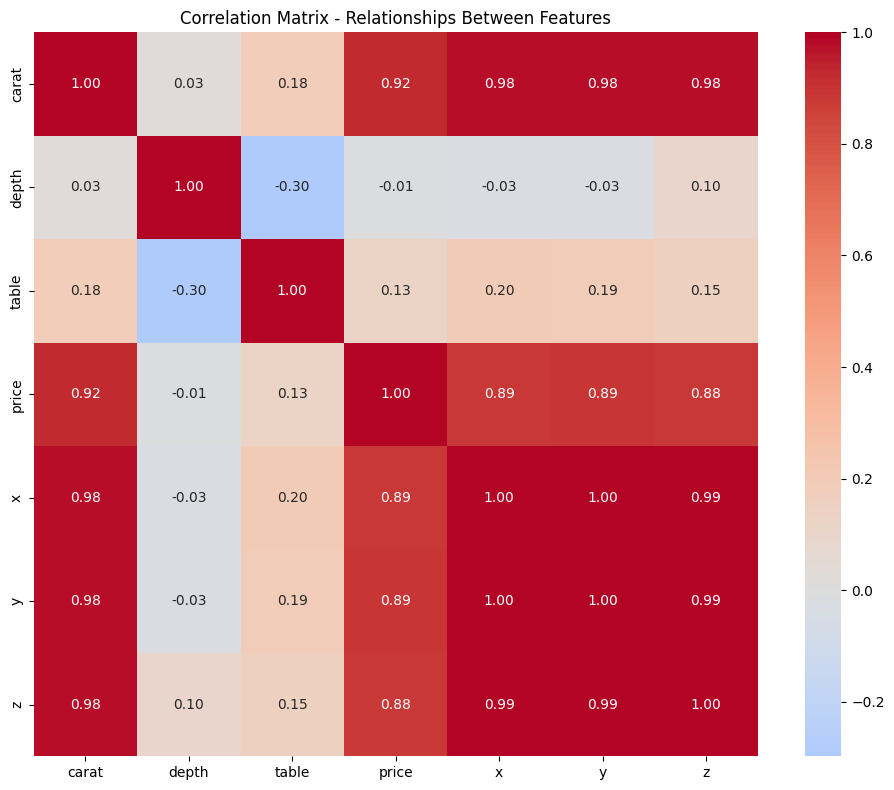


Insight: Carat has the strongest correlation with price (r=0.92),
followed by dimensions x, y, z (r≈0.88). Depth and table have weak correlations.


In [ ]:
# INSIGHT 2: What Predicts Price? (Correlation Analysis)
print("INSIGHT 2: Which Features Correlate with Price?")

correlation_with_price = df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()['price'].sort_values(ascending=False)
print(correlation_with_price)

plt.figure(figsize=(10, 8))
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix - Relationships Between Features')
plt.tight_layout()
plt.show()

print(f"\nInsight: Carat has the strongest correlation with price (r={correlation_with_price['carat']:.2f}),")
print(f"followed by dimensions x, y, z (r≈0.88). Depth and table have weak correlations.")

INSIGHT 3: Carat-Price Relationship


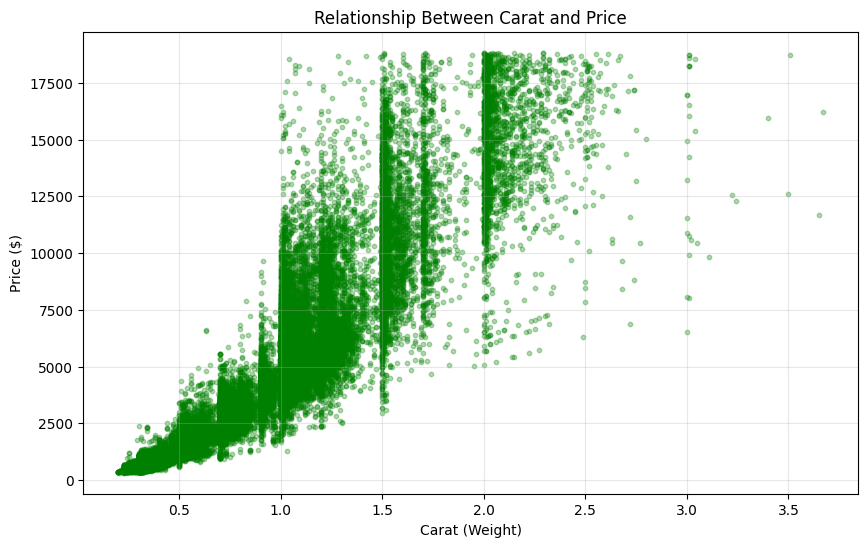

Insight: There's a strong positive relationship between carat and price.
The relationship appears exponential rather than linear - larger diamonds
are disproportionately more expensive per carat.


In [ ]:
#INSIGHT 3: Carat vs Price Relationship
print("INSIGHT 3: Carat-Price Relationship")

plt.figure(figsize=(10, 6))
plt.scatter(df['carat'], df['price'], alpha=0.3, s=10, color='green')
plt.xlabel('Carat (Weight)')
plt.ylabel('Price ($)')
plt.title('Relationship Between Carat and Price')
plt.grid(True, alpha=0.3)
plt.show()

print("Insight: There's a strong positive relationship between carat and price.")
print("The relationship appears exponential rather than linear - larger diamonds")
print("are disproportionately more expensive per carat.")

INSIGHT 4: How Cut Quality Affects Price


/tmp/ipython-input-2128182057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Set2')


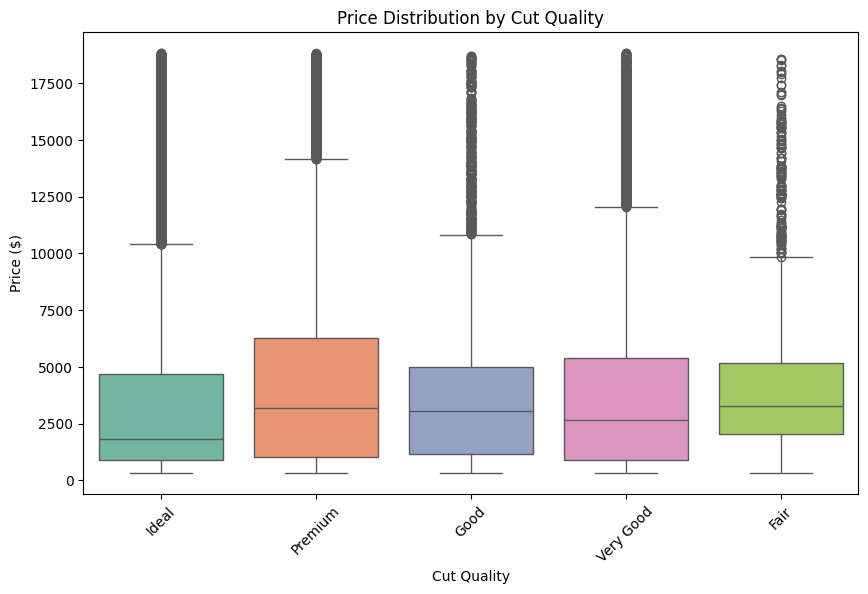

Insight: Cut quality shows surprising patterns - Premium and Ideal cuts
don't always have higher median prices, suggesting carat weight dominates pricing.


In [ ]:
#INSIGHT 4: Categorical Variables
print("INSIGHT 4: How Cut Quality Affects Price")

plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=df, palette='Set2')
plt.xlabel('Cut Quality')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Cut Quality')
plt.xticks(rotation=45)
plt.show()

print("Insight: Cut quality shows surprising patterns - Premium and Ideal cuts")
print("don't always have higher median prices, suggesting carat weight dominates pricing.")

In [ ]:
# Create random sample of 12,500 records
diamonds_model = df.sample(n=12500, random_state=42)

print(f"\nOriginal cleaned dataset: {len(df)} records")
print(f"diamonds_model sample: {len(diamonds_model)} records")
print("\nFirst 5 rows of diamonds_model:")
print(diamonds_model.head())

# Verify the sample is representative
print("\nVerifying sample is representative:")
print(f"\nOriginal price mean: ${df['price'].mean():.2f}")
print(f"Sample price mean: ${diamonds_model['price'].mean():.2f}")
print(f"\nOriginal carat mean: {df['carat'].mean():.3f}")
print(f"Sample carat mean: {diamonds_model['carat'].mean():.3f}")


Original cleaned dataset: 53766 records
diamonds_model sample: 12500 records

First 5 rows of diamonds_model:
       carat        cut color clarity  depth  table  price     x     y     z
6408    0.76      Ideal     E     VS2   62.1   55.0   4039  5.84  5.88  3.64
2676    0.70  Very Good     D     VS1   61.5   55.0   3239  5.70  5.74  3.52
15147   1.52      Ideal     J     SI2   62.7   56.0   6089  7.28  7.20  4.54
21558   1.00       Good     F      IF   60.7   64.0   9660  6.42  6.40  3.89
51000   0.73  Very Good     F     SI1   61.6   62.0   2326  5.71  5.76  3.53

Verifying sample is representative:

Original price mean: $3929.71
Sample price mean: $3893.81

Original carat mean: 0.797
Sample carat mean: 0.795


**Q3-Linear regressions algorithm to determine price of diamonds**

**Q4-PCA to select the 2 most suitable features among all continuous variables that have a strong correlation to the prices featur**e.

**Q5-To the model developed in question 3, fit 2 different regression models using Lasso and Ridge regularisation techniques and validate accuracies for both models**

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Use the data (X and y) from Q3
# Assuming X, y, X_train, X_test, y_train, y_test are still available from the previous Q3 code

# 1. Lasso Regression

print("--- Lasso Regression ---")

# Create a pipeline with scaling and Lasso regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Lasso(alpha=1.0, random_state=42)) # You can tune alpha
])

# Train the Lasso model
lasso_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate Lasso model performance
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"R-squared (R²) for Lasso: {lasso_r2:.4f}")
print(f"Root Mean Squared Error (RMSE) for Lasso: {lasso_rmse:.4f}")

# 2. Ridge Regression

print("\n--- Ridge Regression ---")

# Create a pipeline with scaling and Ridge regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0, random_state=42)) # You can tune alpha
])

# Train the Ridge model
ridge_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_pipeline.predict(X_test)

# Evaluate Ridge model performance
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"R-squared (R²) for Ridge: {ridge_r2:.4f}")
print(f"Root Mean Squared Error (RMSE) for Ridge: {ridge_rmse:.4f}")

# Optional: Visualize Lasso and Ridge predictions (similar to Q3)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Lasso)")
plt.title(f"Actual vs Predicted Prices (Lasso - R²: {lasso_r2:.4f})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.4, color='orange')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (Ridge)")
plt.title(f"Actual vs Predicted Prices (Ridge - R²: {ridge_r2:.4f})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

**Q6-Comparing the 4 models developed in questions 3, 4 and 5 which registered thehighest accuracy? What is likely to lead to this performance**